In [1]:
from pathlib import Path
import sys
sys.path.append('../')
from pma_open import *


#My image
file_path = 'Dropbox Files/hel1.pma'
image_path = "../Channel Mapping/hel1_Avg_Frame/hel1_Avg_Frame.png"
image = io.imread(image_path, as_gray=True)

#Chanel image paths
CH1_img_path = "../Channel Mapping/hel1_Avg_Frame/hel1_Avg_Frame_CH1.png"
CH2_img_path = "../Channel Mapping/hel1_Avg_Frame/hel1_Avg_Frame_CH2.png"

good_peaks_1,_ = good_peak_finder(CH1_img_path)
good_peaks_2_new,_ = good_peak_finder(CH2_img_path, sigma=2, block_size=16, scaler_percent=10, boarder=10, max_rad=3)

# Move good_peaks_1 to CH2 to display full image
good_peaks_1_CH2 = shift_peaks(good_peaks_1)
good_peaks_2_CH2 = shift_peaks(good_peaks_2_new)

# Poly Mapping
CH1_peaks_10= np.array([[14, 190], [308, 10], [493, 131], [115, 168], [273, 61], [55, 59], [179, 41], [234, 157], [365, 161], [502, 43]])
CH2_peaks_10 = np.array([[18, 449], [311, 269], [492, 388], [119, 427], [276, 319], [60, 318], [183, 300], [236, 416], [364, 419], [501, 301]])

params_x_man_10, params_y_man_10 = find_polyfit_params(CH1_peaks_10, CH2_peaks_10, degree=3)
mapped_peaks_10 = apply_polyfit_params(good_peaks_1, params_x_man_10, params_y_man_10).astype(np.uint16)
poly_pair_count_tol4_10, poly_pair_arr_CH1_tol4_10, poly_pair_arr_CH2_tol4_10 = find_polyfit_pairs(mapped_peaks_10, good_peaks_1, tolerance=4)


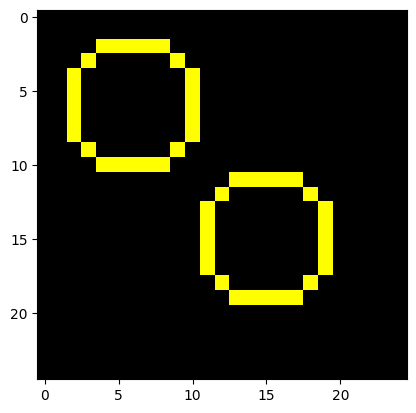

In [2]:
radius = 4
background_dim= 25
x_cen = np.array([6, 15])
y_cen = np.array([6, 15])
circle_array = draw_circle(radius, x_cen, y_cen, 25)
plt.imshow(circle_array)

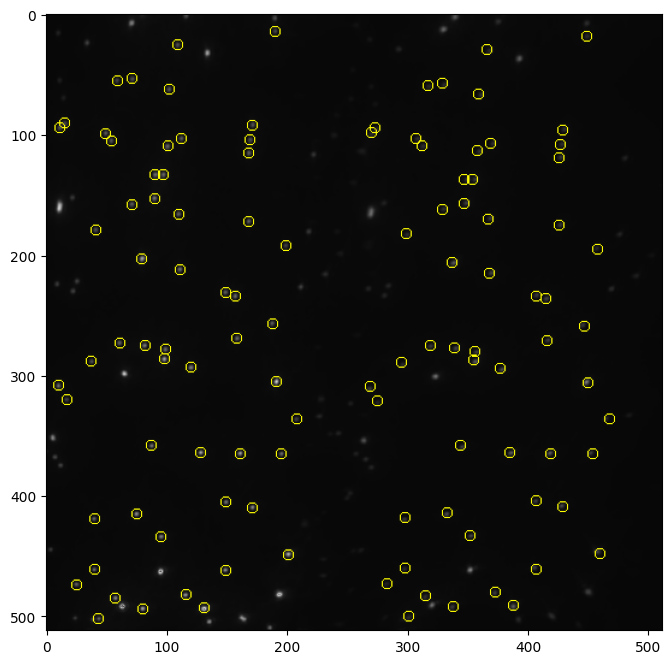

In [3]:
y_centre = np.concatenate((poly_pair_arr_CH1_tol4_10[:,1], poly_pair_arr_CH2_tol4_10[:,1]), axis=None)
x_centre = np.concatenate((poly_pair_arr_CH1_tol4_10[:,0], poly_pair_arr_CH2_tol4_10[:,0]), axis=None)
circle_array = draw_circle(4, y_centre, x_centre, image.shape[0])

mask = (circle_array == [255, 255, 0]).all(axis=-1)
if image.ndim == 2:
    image_3d = np.repeat(image[..., np.newaxis], 3, -1)
elif image.ndim==3 and image.shape[2]==3:
    image_3d = image
image_3d[mask] = [255, 255, 0]

fig = plt.figure(figsize=(8,8))
ax = fig.subplots()
plt.imshow(image_3d)
plt.show()


In [4]:
print(len(circle_array))
print(circle_array[0])

512
[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]


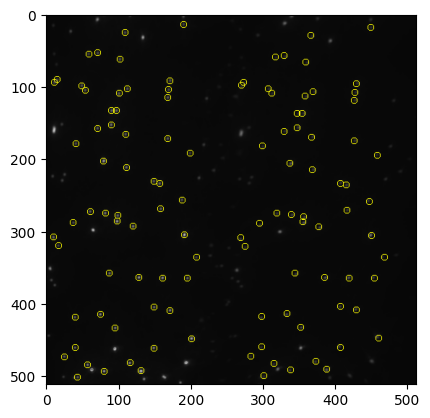

In [5]:
plot_circle(image, 4, y_centre, x_centre, image.shape[0])

In [6]:
print(type(good_peaks_1))

<class 'numpy.ndarray'>


In [7]:
poly_pair_CH1 = np.array((poly_pair_arr_CH1_tol4_10[:,1], poly_pair_arr_CH1_tol4_10[:,0])).T
poly_pair_CH2 = np.array((poly_pair_arr_CH2_tol4_10[:,1], poly_pair_arr_CH2_tol4_10[:,0])).T

In [8]:
print(poly_pair_arr_CH1_tol4_10[:5,1])
print(poly_pair_arr_CH1_tol4_10[:5,0])
print(poly_pair_CH1[:5])

[131 191  80 201  98]
[493 305 494 449 286]
[[131 493]
 [191 305]
 [ 80 494]
 [201 449]
 [ 98 286]]


In [9]:
print(poly_pair_arr_CH2_tol4_10[:5,1])
print(poly_pair_arr_CH2_tol4_10[:5,0])
print(poly_pair_CH2[:5])

[388 450 338 460 355]
[491 306 492 448 287]
[[388 491]
 [450 306]
 [338 492]
 [460 448]
 [355 287]]


In [10]:
print(type(poly_pair_CH1))

<class 'numpy.ndarray'>


In [11]:
print(type(circle_array))

<class 'numpy.ndarray'>


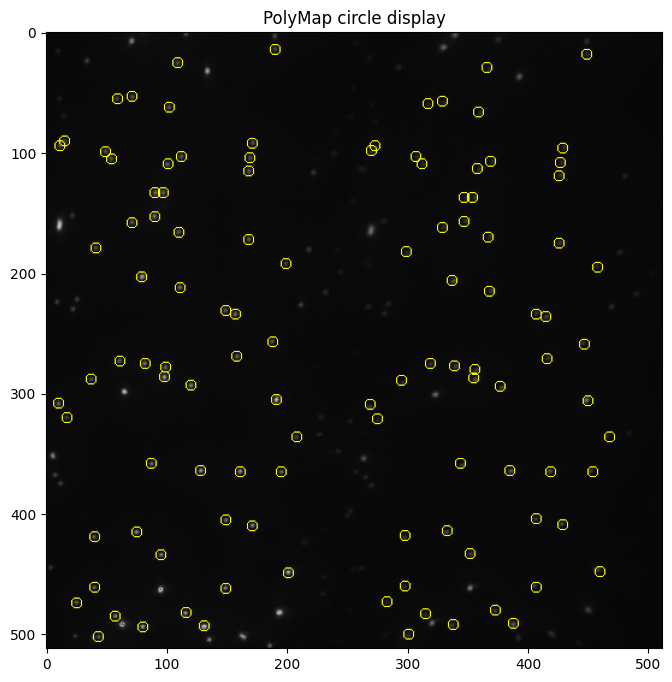

In [12]:
circle_array_CH1 = draw_circle(4, poly_pair_arr_CH1_tol4_10[:,1], poly_pair_arr_CH1_tol4_10[:,0], image.shape[0])
circle_array_CH2 = draw_circle(4, poly_pair_arr_CH2_tol4_10[:,1], poly_pair_arr_CH2_tol4_10[:,0], image.shape[0])
circle_array_new = circle_array_CH1 + circle_array_CH2

mask_new = (circle_array_new == [255, 255, 0]).all(axis=-1)
if image.ndim == 2:
    image_3d = np.repeat(image[..., np.newaxis], 3, -1)
elif image.ndim==3 and image.shape[2]==3:
    image_3d = image
image_3d[mask_new] = [255, 255, 0]

fig = plt.figure(figsize=(8,8))
ax = fig.subplots()
plt.imshow(image_3d)
plt.title('PolyMap circle display')
plt.show()

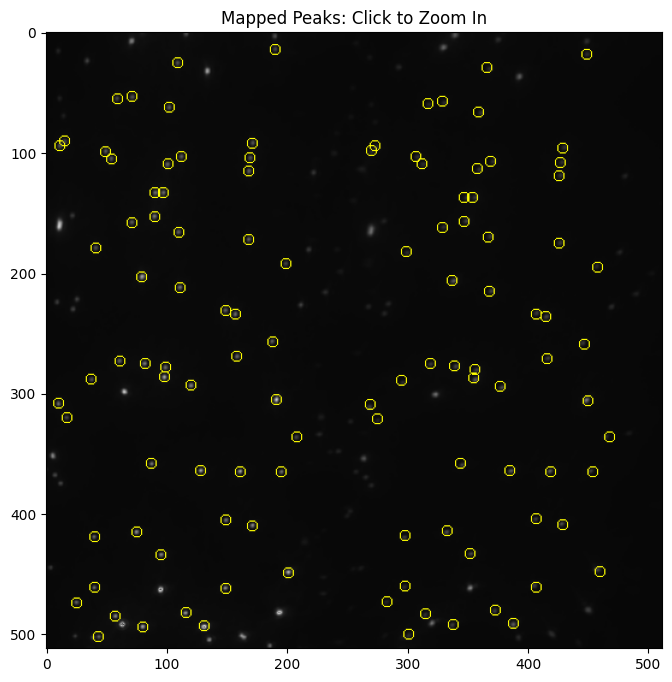

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image_3d)
scat1 = ax.scatter(poly_pair_arr_CH1_tol4_10[:,1], poly_pair_arr_CH1_tol4_10[:,0], s=50, facecolors='none', edgecolors='b', alpha=0)
scat2 = ax.scatter(poly_pair_arr_CH2_tol4_10[:,1], poly_pair_arr_CH2_tol4_10[:,0], s=50, facecolors='none', edgecolors='r', alpha=0)
scatter_data = [(scat1, poly_pair_arr_CH1_tol4_10 , "CH1"), (scat2, poly_pair_arr_CH2_tol4_10 , "CH2")]
plt.show()

In [15]:
scatter_data = [(scat1, poly_pair_arr_CH1_tol4_10 , "CH1"), (scat2, poly_pair_arr_CH2_tol4_10 , "CH2")]
print(scatter_data[0][1])

[[493 131]
 [305 191]
 [494  80]
 [449 201]
 [286  98]
 [364 128]
 [203  79]
 [365 161]
 [415  75]
 [482 116]
 [485  57]
 [410 171]
 [462 149]
 [434  95]
 [293 120]
 [275  82]
 [153  90]
 [405 149]
 [212 111]
 [358  87]
 [234 157]
 [278  99]
 [365 195]
 [133  90]
 [461  40]
 [133  97]
 [308  10]
 [419  40]
 [269 158]
 [273  61]
 [109 101]
 [172 168]
 [474  25]
 [231 149]
 [502  43]
 [115 168]
 [166 110]
 [103 112]
 [158  71]
 [ 62 102]
 [257 188]
 [105  54]
 [ 99  49]
 [ 94  11]
 [179  41]
 [ 25 109]
 [ 92 171]
 [ 53  71]
 [104 169]
 [288  37]
 [ 14 190]
 [320  17]
 [ 55  59]
 [ 90  15]
 [192 199]
 [336 208]]
